# Mezclas gaussianas

Un modelo de mezclas gaussianas (GMM) es una técnica estadística para identificar subgrupos dentro de un conjunto de datos. Es similar a K-means en que ambos buscan agrupar datos, pero a diferencia de K-means, que asigna cada punto a un solo cluster, GMM considera que cada punto tiene una probabilidad de pertenecer a cada cluster. GMM es útil en tareas de clasificación y análisis de agrupamiento cuando los grupos tienen diferentes varianzas.

### Formulación Matemática
En GMM, asumimos que los datos son generados a partir de una mezcla de varias distribuciones gaussianas. Cada una de estas distribuciones representa un 'cluster'. Matemáticamente, la función de densidad de probabilidad para un GMM se define como una suma ponderada de $M$ componentes gaussianas:

$$p(\mathbf{x}) = \sum_{i=1}^{M} \phi_i \mathcal{N}(\mathbf{x} | \mathbf{\mu}_i, \mathbf{\Sigma}_i)$$

donde $\mathbf{x}$ es un punto de datos, $\phi_i$ es el peso del $i$-ésimo componente (que cumple con la condición $\sum_{i=1}^{M} \phi_i = 1$), y $\mathcal{N}(\mathbf{x} | \mathbf{\mu}_i, \mathbf{\Sigma}_i)$ es la función de densidad de la distribución normal con media $\mathbf{\mu}_i$ y covarianza $\mathbf{\Sigma}_i$.

El algoritmo de Expectation-Maximization (EM) se utiliza para encontrar los parámetros del modelo. El algoritmo alterna entre dos pasos:
1. **Expectation (E)**: Calcular la probabilidad de que cada punto de datos pertenezca a cada componente del modelo.
2. **Maximization (M)**: Actualizar los parámetros del modelo (pesos, medias y covarianzas) para maximizar la verosimilitud de los datos dado estos parámetros.

El algoritmo de Expectation-Maximization (EM) es un enfoque iterativo para encontrar estimaciones de máxima verosimilitud o máxima a posteriori de parámetros en modelos estadísticos, donde el modelo depende de variables latentes no observadas. Se utiliza ampliamente en situaciones donde los datos son incompletos o tienen una estructura oculta, como es el caso de los modelos de mezclas gaussianas (GMM). Aquí se explica el algoritmo EM en el contexto de GMM:

### Pasos del Algoritmo EM para GMM

1. **Inicialización**: Se inicializan los parámetros del modelo. En el contexto de GMM, estos son los pesos $\phi_i$, las medias $\mu_i$, y las covarianzas $\Sigma_i$ de cada componente gaussiano. La inicialización puede ser aleatoria o basada en algún criterio heurístico.

2. **Paso E (Expectation)**: En este paso, calculamos la probabilidad de que cada punto de datos pertenezca a cada componente del modelo (es decir, la probabilidad a posteriori). Esta probabilidad se denota como $\gamma(z_{nk})$ y se calcula utilizando la fórmula de Bayes:

   $$\gamma(z_{nk}) = \frac{\phi_k \mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \mathbf{\Sigma}_k)}{\sum_{j=1}^{M} \phi_j \mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_j, \mathbf{\Sigma}_j)}$$

   donde $\mathbf{x}_n$ es el $n$-ésimo punto de datos, y $z_{nk}$ es una variable binaria que indica si el $n$-ésimo punto de datos pertenece al $k$-ésimo cluster.

3. **Paso M (Maximization)**: En este paso, actualizamos los parámetros del modelo utilizando los valores calculados en el Paso E. Los nuevos parámetros se calculan como sigue:

   - **Peso de cada componente** $\phi_k$:
     $$\phi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_{nk})$$
   
   - **Media de cada componente** $\mu_k$:
     $$\mu_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) \mathbf{x}_n}{\sum_{n=1}^{N} \gamma(z_{nk})}$$

   - **Covarianza de cada componente** $\Sigma_k$:
     $$\Sigma_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (\mathbf{x}_n - \mu_k)(\mathbf{x}_n - \mu_k)^T}{\sum_{n=1}^{N} \gamma(z_{nk})}$$

4. **Convergencia**: Los pasos E y M se repiten hasta que el cambio en los parámetros del modelo o la mejora en la verosimilitud del modelo entre iteraciones consecutivas cae por debajo de un umbral predefinido, indicando convergencia.

### Interpretación Matemática y Práctica

- En el **Paso E**, estamos estimando la probabilidad de que cada punto de datos pertenezca a cada cluster basándonos en los parámetros actuales. Esencialmente, estamos tratando de "adivinar" la estructura oculta de los datos con la información que tenemos.

- En el **Paso M**, ajustamos los parámetros del modelo para maximizar la verosimilitud de los datos dados estos "adivinanzas" iniciales. Estamos refinando nuestros parámetros para alinearlos mejor con la estructura oculta que hemos inferido.

El algoritmo EM para GMM es un ejemplo de cómo podemos modelar y descubrir estructuras ocultas en los datos cuando no tenemos observaciones directas de estas estructuras, un escenario común en muchas aplicaciones de estadística y machine learning.



### Implementación en Python
Para implementar un GMM en Python, una opción es utilizar la biblioteca `scikit-learn`. Aquí hay un ejemplo básico:



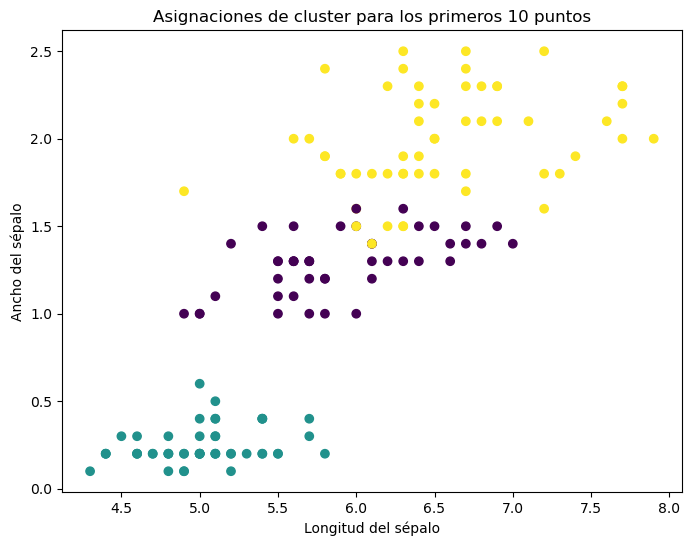

In [24]:
# graficar los puntos con colores según las asignaciones de cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c=labels, cmap='viridis')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Asignaciones de cluster para los primeros 10 puntos')
plt.show()

In [25]:
import pandas as pd

# Cargar el conjunto de datos Old Faithful
# Puedes reemplazar la URL con la ruta de tu archivo local si es necesario
faithful_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/faithful.csv"
faithful = pd.read_csv(faithful_url)
# erase the first column
faithful.drop(faithful.columns[[0]], axis=1, inplace=True)
faithful.head()


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [26]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def E_step(theta, data):
    pi1, pi2 = theta['pi']
    mu1, mu2 = theta['mu1'], theta['mu2']
    sigma1, sigma2 = theta['sigma1'], theta['sigma2']
    
    likelihood1 = multivariate_normal.pdf(data, mean=mu1, cov=sigma1)
    likelihood2 = multivariate_normal.pdf(data, mean=mu2, cov=sigma2)
    gamma1 = pi1 * likelihood1
    gamma2 = pi2 * likelihood2
    norm_factor = gamma1 + gamma2
    log_likelihood = np.sum(np.log(norm_factor))
    # normalizar, para que la suma de las probabilidades sea 1,
    # además, regresar la log-likelihood negativa para monitorear la convergencia
    return np.column_stack((gamma1 / norm_factor, gamma2 / norm_factor)), -log_likelihood
def M_step(T, data):
    N1 = T[:, 0].sum()
    N2 = T[:, 1].sum()
    
    mu1 = np.average(data, axis=0, weights=T[:, 0])
    mu2 = np.average(data, axis=0, weights=T[:, 1])
    
    sigma1 = np.cov(data, rowvar=False, aweights=T[:, 0])
    sigma2 = np.cov(data, rowvar=False, aweights=T[:, 1])
    
    return {
        'pi': [N1 / len(data), N2 / len(data)],
        'mu1': mu1,
        'mu2': mu2,
        'sigma1': sigma1,
        'sigma2': sigma2
    }


In [27]:
def plot_em(theta, data):
    x, y = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 100),
                       np.linspace(data[:, 1].min(), data[:, 1].max(), 100))
    pos = np.dstack((x, y))

    rv1 = multivariate_normal(theta['mu1'], theta['sigma1'])
    rv2 = multivariate_normal(theta['mu2'], theta['sigma2'])

    plt.contour(x, y, rv1.pdf(pos) + rv2.pdf(pos), colors='red')
    plt.scatter(data[:, 0], data[:, 1])
    plt.xlabel('Eruption time (mins)')
    plt.ylabel('Waiting time (mins)')
    plt.title('Old Faithful Geyser Data')
    plt.show()


Iteración: 0, Loss: 2192.7296


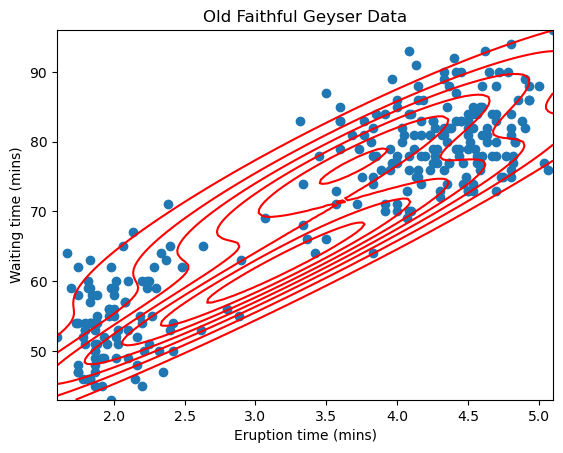

Iteración: 5, Loss: 1286.2329


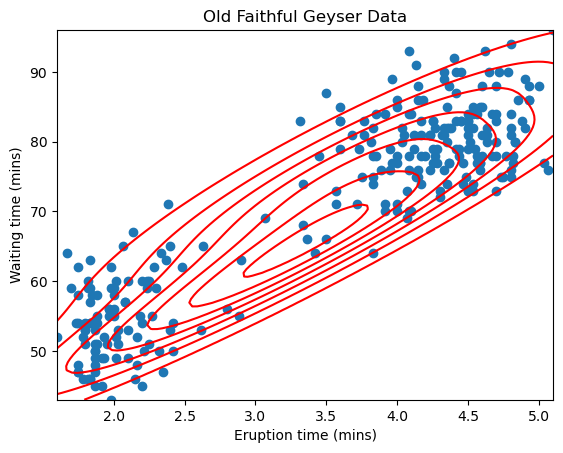

Iteración: 10, Loss: 1285.5349


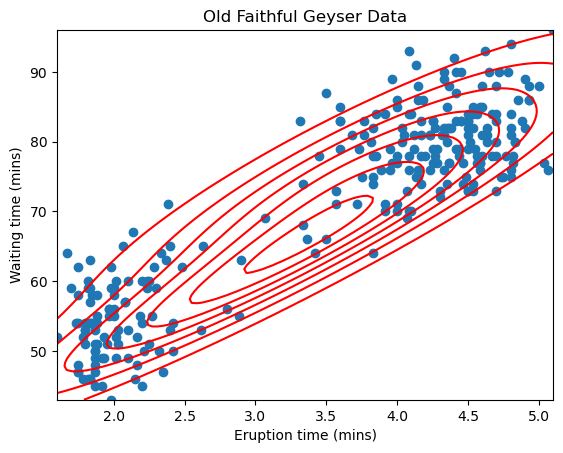

Iteración: 15, Loss: 1284.1308


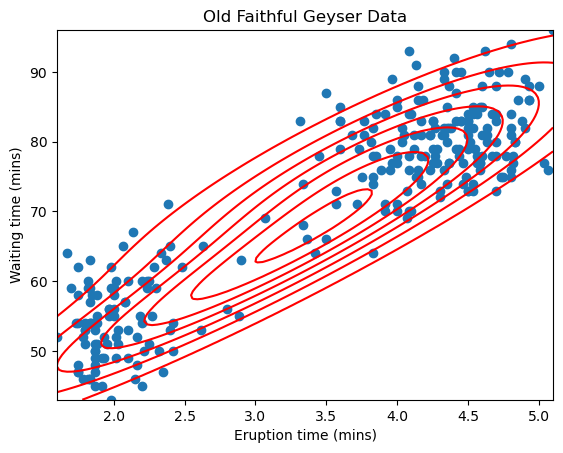

Iteración: 20, Loss: 1267.0859


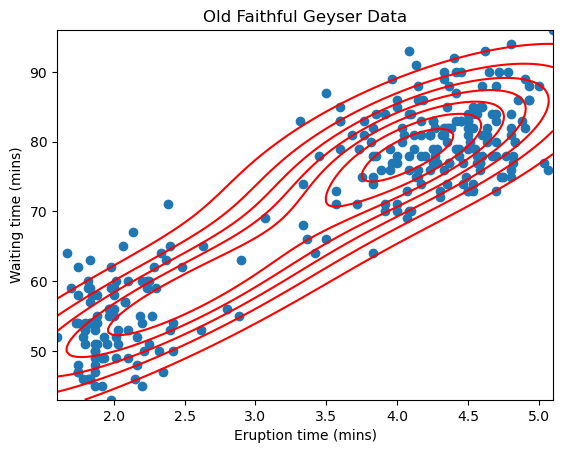

Iteración: 25, Loss: 1132.2385


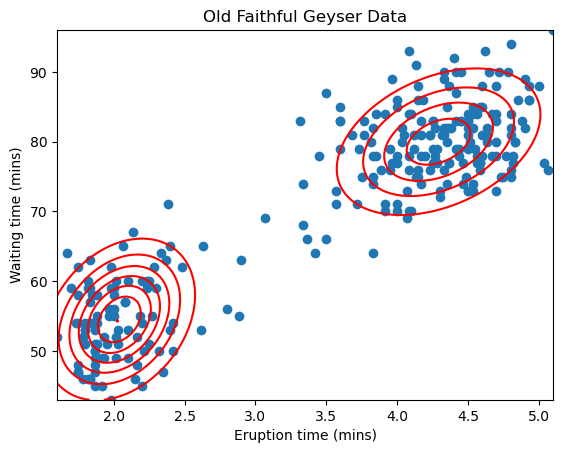

Iteración: 30, Loss: 1130.2721


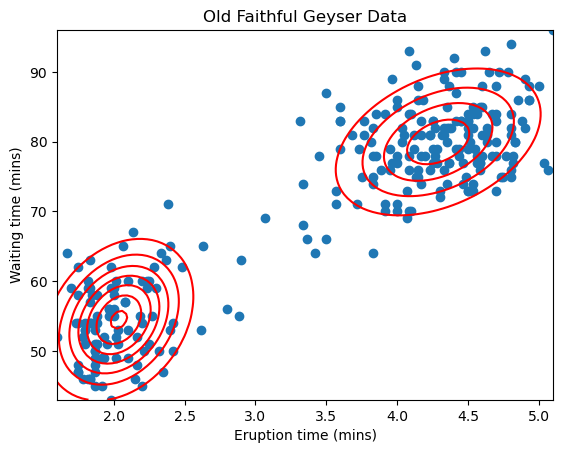

Iteración: 35, Loss: 1130.2720


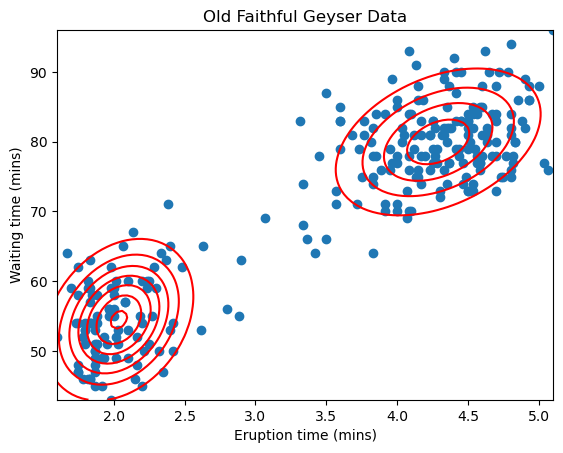

Iteración: 40, Loss: 1130.2720


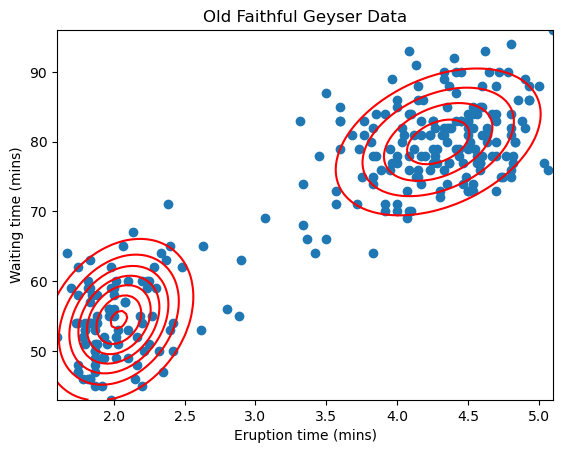

Iteración: 45, Loss: 1130.2720


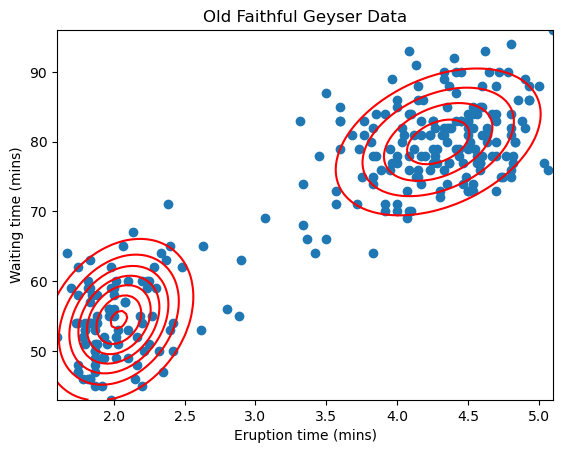

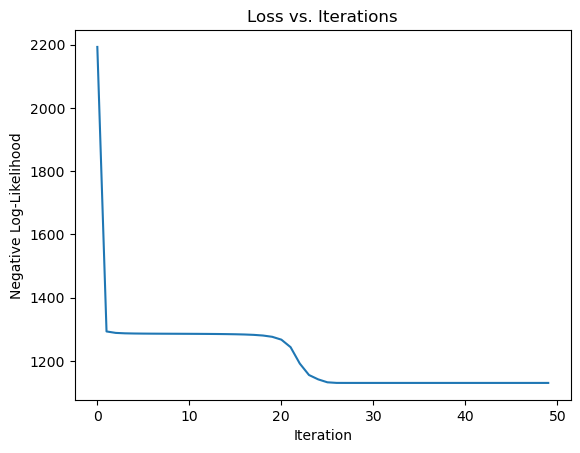

In [28]:
# Almacenar la pérdida en cada iteración
losses = []
# Conversión de DataFrame a Numpy Array
data = faithful.to_numpy()

# Inicialización de parámetros
theta = {
    'pi': [0.5, 0.5],
    'mu1': [2.8, 75],
    'mu2': [3.6, 58],
    'sigma1': np.array([[0.8, 7], [7, 70]]),
    'sigma2': np.array([[0.8, 7], [7, 70]])
}
for iter in range(50):
    T, loss = E_step(theta, data)
    theta = M_step(T, data)

    losses.append(loss)
    # graficar cada 5 iteraciones
    if iter % 5 == 0:
        print('Iteración: %d, Loss: %.4f' % (iter, loss))
        plot_em(theta, data)

# Graficar la pérdida
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.title('Loss vs. Iterations')
plt.show()


In [31]:
# Ahora usamos gaussianmixture de sklearn
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data)
print("=== Gaussian Mixture Model from sklearn=================================")
print('pi:', gmm.weights_)
print('mu1:', gmm.means_[0])
print('mu2:', gmm.means_[1])
print('sigma1:', gmm.covariances_[0])
print('sigma2:', gmm.covariances_[1])

print("=== Gaussian Mixture Model from scratch ================================")
print('pi:', theta['pi'])
print('mu1:', theta['mu1'])
print('mu2:', theta['mu2'])
print('sigma1:', theta['sigma1'])
print('sigma2:', theta['sigma2'])



=== Gaussian Mixture Model from sklearn=================================
pi: [0.35592745 0.64407255]
mu1: [ 2.03652149 54.47986018]
mu2: [ 4.28977944 79.96953298]
sigma1: [[ 0.06927449  0.43627723]
 [ 0.43627723 33.70493352]]
sigma2: [[ 0.16982046  0.93871793]
 [ 0.93871793 36.02497019]]
=== Gaussian Mixture Model from scratch ================================
pi: [0.6441145507162629, 0.3558854492837371]
mu1: [ 4.2896878  79.96841278]
mu2: [ 2.03642144 54.47887964]
sigma1: [[ 0.17091213  0.94562169]
 [ 0.94562169 36.24895215]]
sigma2: [[ 0.06991678  0.4400356 ]
 [ 0.4400356  34.05107916]]


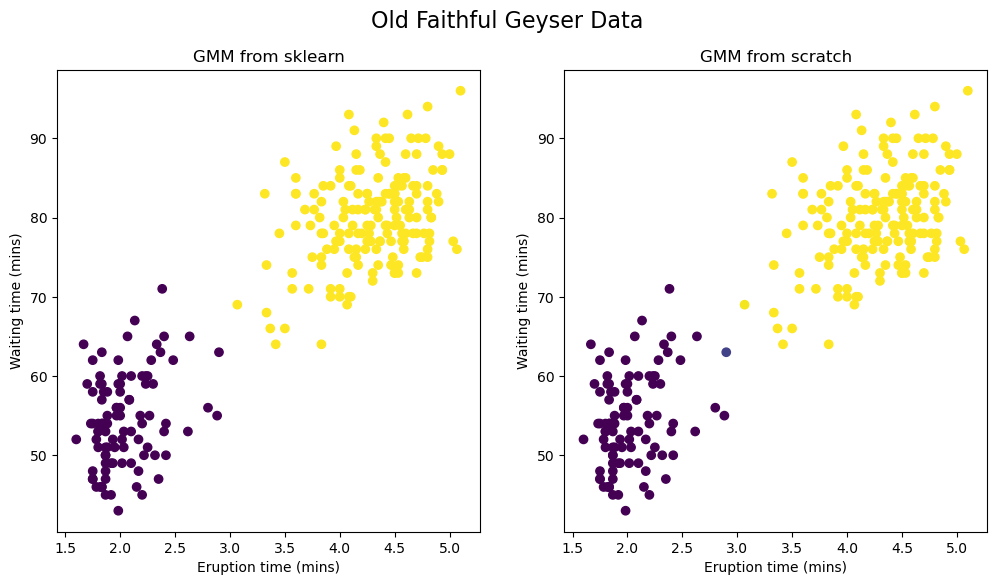

In [30]:
# Graficar los resultados, agregar etiquetas de cluster y contornos de densidad
# usando plot_em para ambos métodos

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Old Faithful Geyser Data', fontsize=16)
ax1, ax2 = fig.subplots(1, 2)
ax1.set_title('GMM from sklearn')
ax2.set_title('GMM from scratch')
ax1.scatter(data[:, 0], data[:, 1], c=gmm.predict(data), cmap='viridis')
ax2.scatter(data[:, 0], data[:, 1], c=T[:, 0], cmap='viridis')
ax1.set_xlabel('Eruption time (mins)')
ax1.set_ylabel('Waiting time (mins)')
ax2.set_xlabel('Eruption time (mins)')
ax2.set_ylabel('Waiting time (mins)')
plt.show()



### Interpretación de los Resultados
En un GMM, cada punto de datos se asigna a cada cluster con una probabilidad. Por lo tanto, en lugar de asignaciones duras como en K-means, tenemos asignaciones "blandas". Al interpretar los resultados:
- Los **centros de los clusters** (medias de los componentes gaussianos) nos indican dónde se ubican los diferentes grupos en el espacio de datos.
- Las **matrices de covarianza** nos muestran la forma y orientación de cada cluster.
- Las **probabilidades de pertenencia** nos ayudan a entender la certeza de la asignación de cada punto a los diferentes clusters.

Este enfoque proporciona una visión más rica de la estructura de los datos, especialmente útil cuando los clusters son de formas y tamaños variados.